<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<center><h1>Simple RNN vs LSTM vs GRU</center>

---
# **Table of Contents**
---

**1.**	[**Probelm Description**](#section1)<br>
**2.**	[**Importing Libraries**](#section2)<br>
**3.**	[**Data Description and Preprocessing**](#section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)

**4.**	[**SimpleRNN Model**](#section4)<br>
  - **4.1** [**Model Building**](#Section31)
  - **4.2** [**Model Evaluation**](#Section31)

**5.**	[**LSTM Model**](#section6)<br>
  - **5.1** [**Model Building**](#Section31)
  - **5.2** [**Model Evaluation**](#Section31)

**6.**	[**GRU Model**](#section6)<br>
  - **6.1** [**Model Building**](#Section31)
  - **6.2** [**Model Evaluation**](#Section31)

**7.** [**Conclusion**](#section7)<br>

---
<a name = Section1></a>
# **1. Problem Description**
---

- Classifying **movie** reviews: a **binary** classification example.

- **Two-class** classification, or **binary classification**, may be the most **widely** applied kind of machine-learning **problem**.
 
 - In this tutorial, we will see **how** **Simple RNN, LSTM** and **GRU** performing at **classifying** movie reviews as **positive** or **negative**, based on the text content of the **reviews**.

---
<a name = Section3></a>
# **2. Installing & Importing Libraries**
---

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import string
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,GRU,SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score


 **Note:**
 
 - We are **encountering** an error while loading **dataset** from keras library with numpy 1.16
 
 - So install **numpy 1.14** using below cell and **restart** the session.
 
 - You don't have to **re-run** the below cell once you have **restarted** the session after installing numpy 1.14

In [ ]:
# If current version of numpy gives an error while running the dataset below, then run this cell.
# Otherwise skip this cell.

# !pip install numpy==1.14.2

# Restart the session after installing and don't run this cell again after restarting the session

---
<a name = Section4></a>
# **3. Data Description and Preprocessing**
---

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/dataset-original.jpg" width="800" height="400" /></center>

**The IMDB dataset**

 - You’ll work with the **IMDB** dataset: a set of **50,000** highly polarized reviews from the Internet **Movie** Database.  
 
 - They’re split into **25,000 reviews for training** and **25,000 reviews for testing**, each set consisting of **50% negative** and **50% positive reviews**.
 
 - The IMDB dataset **comes packaged with Keras**. It has
**already been preprocessed**: the reviews (sequences of words) have been turned into sequences of integers, where each **integer** stands for a **specific** word in a dictionary.

 - The argument **num_words=10000** means you’ll only keep the top **10,000** most frequently occurring words in the training data. 

- Rare words will be **discarded**. This allows you to work with vector data of manageable size.

- The variables **train_data** and **test_data** are **lists of reviews**; each review is a list of word indices (encoding a sequence of words). 

- **train_labels** and **test_labels** are lists of 0s and 1s, where **0** stands for **negative** and **1** stands for positive.

In [ ]:
# Loading the data
data = pd.read_csv("https://gitlab.com/academics3/insaid-data/-/raw/main/Casestudy%20Data/IMDB_Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'] = data['sentiment'].replace('positive', 1)
data['sentiment'] = data['sentiment'].replace('negative', 0)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<a name = Section31></a>
### **3.1 Data Preprocessing**

In [ ]:
# Downloading stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing the Html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
#Removing the square brackets and urls
def remove_between_square_brackets(text):
    text = re.sub('\[[^]]*\]', '', text)
    return re.sub(r'http\S+', '', text)

In [ ]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [ ]:
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [ ]:
data.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production. filming technique...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically there's family little boy (Jake) thi...,0
4,"Petter Mattei's ""Love Time Money"" visually stu...",1


The training on review data is not as simple as **numerical data**. So, it should be converted to **tokenized vectors** for every sentence. 

In [ ]:
tokenizer = Tokenizer(num_words=10000)
#here the mapping is created,  word to integer mapping (only for the top 10000)
tokenizer.fit_on_texts(data['review'])
#here the mapping is applied to the sentences
vector = tokenizer.texts_to_sequences(data['review'])

In [ ]:
data['review'].iloc[0]

"One reviewers mentioned watching 1 Oz episode hooked. right, exactly happened me.The first thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.I would say main appeal show due fact goes shows dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste Oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [ ]:
vector

In [ ]:
train_set = 40000
max_len_text = 500

In [ ]:
train_data = np.array(vector)[:train_set]
train_label = (np.array(data['sentiment'])[:train_set])
test_data = np.array(vector)[train_set:]
test_label = (np.array(data['sentiment'])[train_set:])

 -  We will **truncate** the each **review** to a length of **500 words**.
 
 - Reviews less than **500** words will be **padded** with **zeros** upto a total review length of 500 words.

In [ ]:
X_train = pad_sequences(train_data, maxlen=max_len_text)
X_test = pad_sequences(test_data, maxlen=max_len_text)

In [ ]:
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (40000, 500)
input_test shape: (10000, 500)


---
<a name = Section4></a>
# **4. Simple RNN Model**
---

<a name = Section41></a>
### **4.1 Model Building**

In [ ]:
model = Sequential()
model.add(Embedding(10000,32, input_length=max_len_text))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history1 = model.fit(X_train, train_label,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 46s 178ms/step - loss: 0.5168 - accuracy: 0.7190 - val_loss: 0.3912 - val_accuracy: 0.8305
Epoch 2/10
250/250 [==============================] - 47s 188ms/step - loss: 0.2554 - accuracy: 0.8992 - val_loss: 0.3207 - val_accuracy: 0.8635
Epoch 3/10
250/250 [==============================] - 46s 184ms/step - loss: 0.1808 - accuracy: 0.9326 - val_loss: 0.3455 - val_accuracy: 0.8735
Epoch 4/10
250/250 [==============================] - 45s 179ms/step - loss: 0.0848 - accuracy: 0.9727 - val_loss: 0.4229 - val_accuracy: 0.8695
Epoch 5/10
250/250 [==============================] - 45s 179ms/step - loss: 0.0371 - accuracy: 0.9902 - val_loss: 0.5088 - val_accuracy: 0.8652
Epoch 6/10
250/250 [==============================] - 45s 180ms/step - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.5691 - val_accuracy: 0.8649
Epoch 7/10
250/250 [==============================] - 46s 184ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.6144 - val_ac

<a name = Section31></a>
### **4.2 Model Evaluation**

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss , label="training_loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() # if you want ne plot then we use this 
  plt.plot(epochs, accuracy , label="training_accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

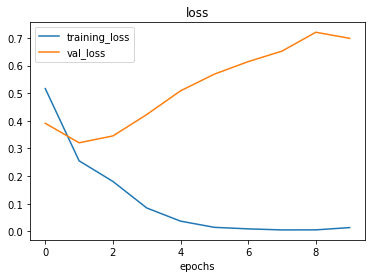

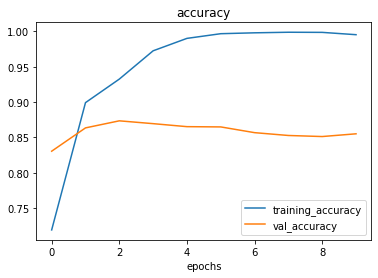

In [ ]:
plot_loss_curves(history1)

**Observation:**

- The highest **accuracy** on validation dataset is **85%**

---
<a name = Section5></a>
# **5. LSTM Model**
---

<a name = Section51></a>
### **5.1 Model Building**

In [ ]:
#lstm
model2 = Sequential()
model2.add(Embedding(10000,32, input_length=max_len_text))
model2.add(LSTM(64))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history2 = model2.fit(X_train, train_label,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 183s 726ms/step - loss: 0.4231 - accuracy: 0.7938 - val_loss: 0.2702 - val_accuracy: 0.8915
Epoch 2/10
250/250 [==============================] - 184s 735ms/step - loss: 0.2188 - accuracy: 0.9165 - val_loss: 0.3095 - val_accuracy: 0.8729
Epoch 3/10
250/250 [==============================] - 184s 735ms/step - loss: 0.1744 - accuracy: 0.9357 - val_loss: 0.2969 - val_accuracy: 0.8886
Epoch 4/10
250/250 [==============================] - 184s 735ms/step - loss: 0.1409 - accuracy: 0.9516 - val_loss: 0.3507 - val_accuracy: 0.8796
Epoch 5/10
250/250 [==============================] - 183s 734ms/step - loss: 0.1116 - accuracy: 0.9618 - val_loss: 0.3438 - val_accuracy: 0.8814
Epoch 6/10
250/250 [==============================] - 183s 734ms/step - loss: 0.0950 - accuracy: 0.9682 - val_loss: 0.3895 - val_accuracy: 0.8723
Epoch 7/10
250/250 [==============================] - 184s 735ms/step - loss: 0.0952 - accuracy: 0.9668 - val_loss: 0.3903 -

<a name = Section52></a>
### **5.2 Model Evaluation**

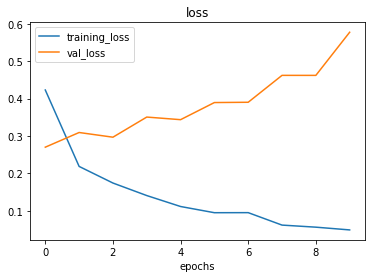

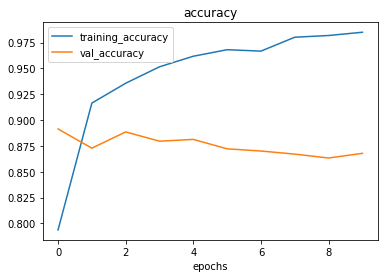

In [ ]:
plot_loss_curves(history2)

**Observation:** 

- The highest **accuracy** on validation dataset is **86%**.

- We can clearly see **LSTM out performs SimpleRNN**.

---
<a name = Section6></a>
# **6. GRU Model**
---

<a name = Section51></a>
### **6.1 Model Building**

In [ ]:
#GRU

model3 = Sequential()
model3.add(Embedding(10000,32, input_length=max_len_text))
model3.add(GRU(64))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 338,881
Trainable params: 338,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history3 = model3.fit(X_train, train_label,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 157s 621ms/step - loss: 0.4155 - accuracy: 0.7943 - val_loss: 0.2848 - val_accuracy: 0.8859
Epoch 2/10
250/250 [==============================] - 153s 614ms/step - loss: 0.2204 - accuracy: 0.9153 - val_loss: 0.2928 - val_accuracy: 0.8827
Epoch 3/10
250/250 [==============================] - 154s 616ms/step - loss: 0.1746 - accuracy: 0.9373 - val_loss: 0.2967 - val_accuracy: 0.8838
Epoch 4/10
250/250 [==============================] - 166s 663ms/step - loss: 0.1475 - accuracy: 0.9472 - val_loss: 0.3217 - val_accuracy: 0.8759
Epoch 5/10
250/250 [==============================] - 163s 653ms/step - loss: 0.1179 - accuracy: 0.9587 - val_loss: 0.3477 - val_accuracy: 0.8748
Epoch 6/10
250/250 [==============================] - 163s 651ms/step - loss: 0.0989 - accuracy: 0.9663 - val_loss: 0.3837 - val_accuracy: 0.8702
Epoch 7/10
250/250 [==============================] - 154s 617ms/step - loss: 0.0809 - accuracy: 0.9724 - val_loss: 0.4551 -

<a name = Section52></a>
### **6.2 Model Evaluation**

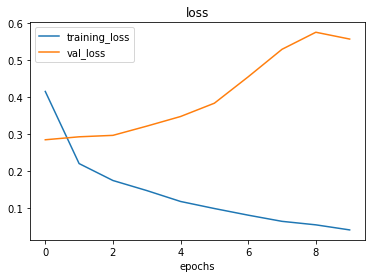

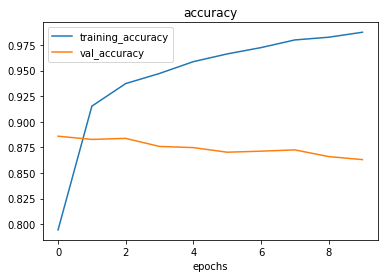

In [ ]:
plot_loss_curves(history3)

**Observations:**

- The highest **accuracy** on validation dataset is **86%**

- There seems to be **slight** improvement in **execution** time

#### The Values for Loss and Accuracy on Training and Validation Data for highest Accuracy on Validation Data

| Model | CPU Time for 10 Epochs(Google Colab) | Loss on Training Data | Loss on Validation Data | Accuracy on Training Data | Accuracy on Validation Data | 
| --- | --- | --- | --- | --- | --- |
| SimpleRNN Model | 8 Minutes | 0.0138  | 0.0138  | 0.9955  | 0.8551|
| LSTM Model | 31 Minutes | 0.0490 | 0.5775  | 0.9851 | 0.8679 |
| GRU Model | 26 Minutes | 0.0410 | 00.5572 | 0.9875 | 0.8630 |




**Obsertvation:** 

- We can observe that **LSTM** and **GRU** model performs better than the **simpleRNN** model.

---
<a name = Section7></a>
# **7. Conclusion**
---

- We have learned how we can **implementation** **SimpleRNN, LSTM and GRU** using Keras.

- We have seen the **performance** of these models and we can **observe** LSTM and GRU **out performs** SimpleRNN model.

- Now its up to you to further **explore** LSTM and GRU and **build** interesting **language models** and compare their **performance**.
